## Phase 2: ML Building

In Phase 1, we completed the EDA step allowing us to understand the different features of the dataset we are working with and performed some pre-processing of the data. Now we want to use the pre-processed X and Y data to start training the ML Classifier model.

In [19]:
import pandas as pd

X = pd.read_csv("/content/X_data")
Y = pd.read_csv("/content/Y_data")

print(X.head())
print(Y.head())

          0         1         2         3         4         5         6  \
0  0.521037  0.022658  0.545989  0.363733  0.593753  0.792037  0.703140   
1  0.643144  0.272574  0.615783  0.501591  0.289880  0.181768  0.203608   
2  0.601496  0.390260  0.595743  0.449417  0.514309  0.431017  0.462512   
3  0.210090  0.360839  0.233501  0.102906  0.811321  0.811361  0.565604   
4  0.629893  0.156578  0.630986  0.489290  0.430351  0.347893  0.463918   

          7         8         9  ...        20        21        22        23  \
0  0.731113  0.686364  0.605518  ...  0.620776  0.141525  0.668310  0.450698   
1  0.348757  0.379798  0.141323  ...  0.606901  0.303571  0.539818  0.435214   
2  0.635686  0.509596  0.211247  ...  0.556386  0.360075  0.508442  0.374508   
3  0.522863  0.776263  1.000000  ...  0.248310  0.385928  0.241347  0.094008   
4  0.518390  0.378283  0.186816  ...  0.519744  0.123934  0.506948  0.341575   

         24        25        26        27        28        29  
0  0

We are going to split the data into training and testing data for the ML Classifier model.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


We are going to use the keras library because of its ease for building and training neural networks.

Specifically in this case, we will be using the Sequential API to build the neural network. Using a linear stack of layers we can build the neural network.

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Here, we first add a dense hidden layer with 16 nodes and 30 input points per sample from the first layer. We also define a dropout of 20% of the node connections between the first and dense layer, randomly. Then we add the output dense layer with 1 node and calculated based on the sigmoid activation function.

In [22]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

None


We will now train our model and display each epoch. Here we have 100 epochs or training passes. At the end of each training pass, the model evaluates using the validation data from X_test and y_test, which helps monitor overfitting and accuracy.

In [23]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3533 - loss: 0.7372 - val_accuracy: 0.3776 - val_loss: 0.7077
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4295 - loss: 0.7034 - val_accuracy: 0.3916 - val_loss: 0.6922
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4906 - loss: 0.6898 - val_accuracy: 0.4476 - val_loss: 0.6785
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5210 - loss: 0.6764 - val_accuracy: 0.5524 - val_loss: 0.6664
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6257 - loss: 0.6699 - val_accuracy: 0.7203 - val_loss: 0.6550
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6867 - loss: 0.6556 - val_accuracy: 0.7902 - val_loss: 0.6440
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7618 - loss: 0.6431 - val_accuracy: 0.8392 - val_loss: 0.6328
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7328 - loss: 0.6417 - val_accuracy: 0.8671 - val_loss:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Here we will display the training/validation loss and training/validation accuracy as 2 separate plots to understand the model performance.

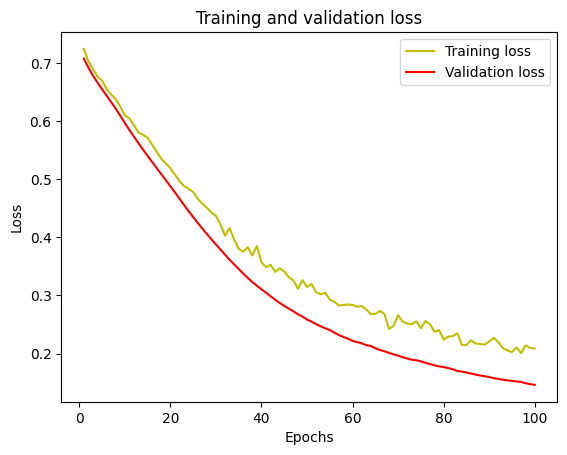

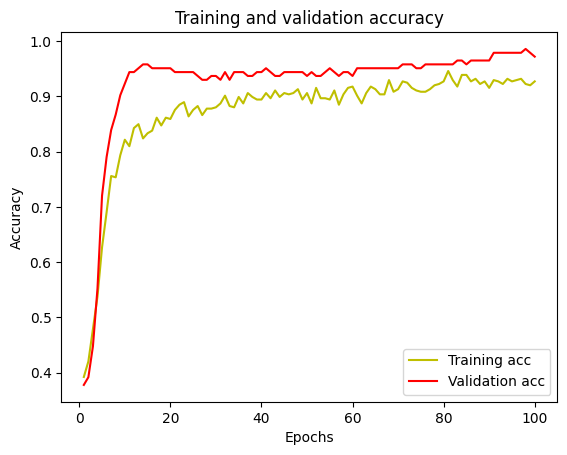

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Using the confusion matrix, we can understand the true accuracy of the model; expecially in binary decisions. This matrix allows us to see how many true positives and negatives the model makes when using the testing data set.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


<Axes: >

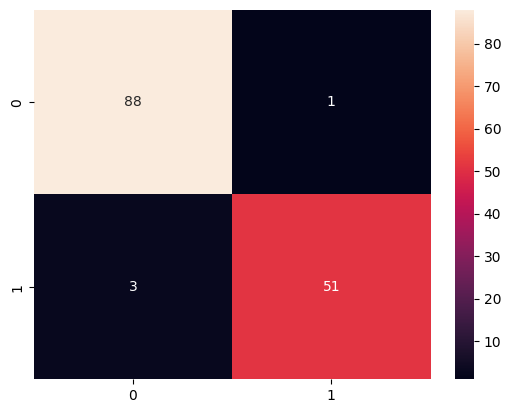

In [27]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

As we can see that the accuracy is quite high. Of the 91 'true' benign tumor cases, the model was able to correctly classify 88 of those cases as benign. Of the 52 'true' malignant tumor cases, the model was able to correctly classify 51 of those cases as malignant. Giving us an accuracy of at least 95% for both cases.